# AMMI Day 4

## Morning Session
### Linear Regression

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
train_df = pd.read_csv('/content/gdrive/My Drive/boston/train.csv', index_col='ID')

In [0]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 1 to 506
Data columns (total 14 columns):
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(3)
memory usage: 39.0 KB


In [0]:
train_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


Can we see a visual relationship between rooms and medv?

In [0]:
train_df[['rm', 'medv']].head()

,rm,medv
ID,,
1,6.575,24.0
2,6.421,21.6
4,6.998,33.4
5,7.147,36.2
7,6.012,22.9


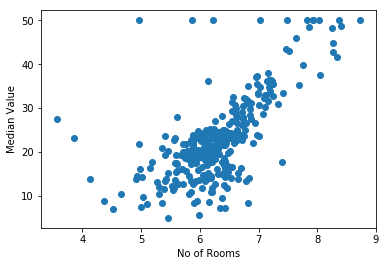

In [0]:
_rooms = train_df['rm'].values
_medv = train_df['medv'].values

plt.scatter(_rooms, _medv)
plt.xlabel('No of Rooms')
plt.ylabel('Median Value')
plt.show()

Can we find an equation for this line?

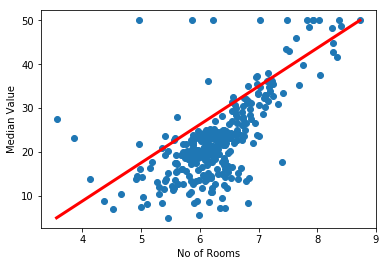

In [0]:
_r = np.linspace(min(_rooms), max(_rooms)).reshape(-1, 1)
_m = np.linspace(min(_medv), max(_medv)).reshape(-1, 1)

plt.scatter(_rooms, _medv)
plt.plot(_r, _m, color='red', linewidth=3)
plt.xlabel('No of Rooms')
plt.ylabel('Median Value')
plt.show()

# Function
* $y = wx + b$
* $y = w_0.x_0 + w_1.x_1$
* $y = w.x$
* $y$ is a predicted variable also called $y_{pred}$
* $w$ is a vector of weights
* $x$ is a vector of predictors

# Cost
* $L = \frac{\sqrt{\sum{(y - y_{pred})^2}}}{n}$

* $y_{pred} = a + wx$
* vectorize the operation
* $y_{pred} = a.w_0 + x.w_1$
* $y_{pred} = (a x) * (w_0 w_1)$
* $y_{pred} = x * w$

# Define y

In [0]:
y = train_df['medv'].values
print(type(y))
print(y.shape)
y = y.reshape(-1, 1)
print(y.shape)

<class 'numpy.ndarray'>
(333,)
(333, 1)


# Define x

In [0]:
train_df['constant'] = 1

In [0]:
train_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,constant
ID,,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,1


In [0]:
columns = ['constant', 'rm', 'zn', 'indus']
x = train_df[columns].values
print(type(x))

<class 'numpy.ndarray'>


In [0]:
print(x.shape)

(333, 4)


In [0]:
w = np.zeros((x.shape[1], 1))
print(type(w))
print(w.shape)
print(w)

<class 'numpy.ndarray'>
(4, 1)
[[0.]
 [0.]
 [0.]
 [0.]]


In [0]:
y_pred = np.dot(x, w)

In [0]:
print(y_pred.shape)

(333, 1)


In [0]:
error = y - y_pred
print(error.shape)
squared_error = np.power(error, 2)
root_mean_squared_error = sqrt(squared_error.sum()) / y_pred.shape[0]

(333, 1)


In [0]:
print(root_mean_squared_error)

1.3449009883922638


## Implement Gradient Descent
* learning rate $\alpha$
* gradient

* gradient is $2 * error$
* gradient update rule is $w = w - gradient * \alpha$

In [0]:
costs = []
w_0_s = []
w_1_s = []

learning_rate = 1e-3
steps = 20

In [0]:
for a in range(steps):
    
    w_0 = w[0][0]
    w_1 = w[1][0]
    
    
    # make prediction
    y_pred = np.dot(x, w)
    error = y - y_pred
    error_squared = np.power(error, 2)
    # cost function is LMS
    LMS = error_squared.sum() / (2 * y.shape[0])
    
    costs.append(LMS)
    w_0_s.append(w_0)
    w_1_s.append(w_1)
    
    # update 
    
    w_0 = w_0 + learning_rate/y.shape[0] * error.sum()
    w_1 = w_1 + learning_rate/y.shape[0] * (error * x[1]).sum()
    
    w[0][0] = w_0
    w[1][0] = w_1

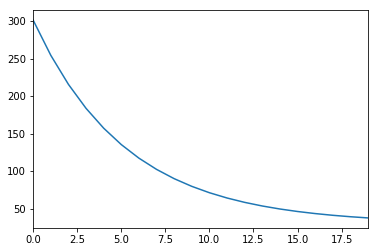

In [0]:
cost_df = pd.DataFrame({'cost': pd.Series(costs), 'w_0': pd.Series(w_0_s), 'w_1': pd.Series(w_1_s)})
cost_df['cost'].plot()

In [0]:
print(cost_df)

          cost       w_0       w_1
0   301.158318  0.000000  0.000000
1   254.316387  0.022769  0.329942
2   215.606188  0.043447  0.629597
3   183.610064  0.062228  0.901746
4   157.158060  0.079285  1.148912
5   135.284596  0.094775  1.373390
6   117.192716  0.108844  1.577262
7   102.224599  0.121622  1.762419
8    89.837233  0.133226  1.930580
9    79.582337  0.143765  2.083304
10   71.089809  0.153337  2.222009
11   64.054059  0.162030  2.347982
12   58.222739  0.169926  2.462391
13   53.387446  0.177096  2.566298
14   49.376044  0.183608  2.660667
15   46.046336  0.189523  2.746373
16   43.280837  0.194894  2.824212
17   40.982466  0.199773  2.894905
18   39.070986  0.204203  2.959109
19   37.480069  0.208227  3.017420


In [0]:
print(w_0, w_1)

0.24802277183964103 3.594097986728238


Make a Prediction

In [0]:
_w = [w_0, w_1]
_w = np.asarray(_w)
_x = train_df[['constant', 'rm']].values
y_pred = np.dot(_x, _w)

In [0]:
_p = pd.DataFrame(dict(actual=train_df['medv'].values, predicted=y_pred.reshape(-1)))
_p.head()

,actual,predicted
0,24.0,20.399615
1,21.6,19.926777
2,33.4,21.698385
3,36.2,22.155871
4,22.9,18.670993


## Matrix Multiplication Refresher

$y = w.x + b = w.x$

$\begin{bmatrix} y_{11} \\ y_{21} \\ y_{31} \\ y_{41} \end{bmatrix} = \begin{bmatrix} w_{11}  \\ w_{21}  \end{bmatrix}  \begin{bmatrix} x_{11}  & x_{12} \\ x_{21} & x_{22} \\ x_{31} & x_{32} \\  x_{41} & x_{42} \end{bmatrix} + \begin{bmatrix} b_{11} \\ b_{21} \\ b_{31} \\ b_{41} \end{bmatrix} $

$\begin{bmatrix} y_{11} \\ y_{21} \\ y_{31} \\ y_{41} \end{bmatrix} = \begin{bmatrix} w_{11} * x_{11} + w_{21} * x_{12} \\ w_{11} * x_{21} + w_{21} * x_{22} \\ w_{11} * x_{31} + w_{21} * x_{32} \\ w_{11} * x_{41} + w_{21} * x_{42} \end{bmatrix} + \begin{bmatrix} b_{11} * 1 \\ b_{21} * 1 \\ b_{31} * 1 \\ b_{41} * 1 \end{bmatrix} $

$\begin{bmatrix} y_{11} \\ y_{21} \\ y_{31} \\ y_{41} \end{bmatrix} = \begin{bmatrix} w_{11} * x_{11} + w_{21} * x_{12} + b * 1 \\ w_{11} * x_{21} + w_{21} * x_{22} + b * 1 \\ w_{11} * x_{31} + w_{21} * x_{32} + b * 1 \\ w_{11} * x_{41} + w_{21} * x_{42} + b * 1 \end{bmatrix}$

$\begin{bmatrix} y_{11} \\ y_{21} \\ y_{31} \\ y_{41} \end{bmatrix} = \begin{bmatrix} w_{11} \\ w_{21} \\ w_{31}  \end{bmatrix} \bullet \begin{bmatrix}  x_{11} & x_{12} & 1 \\  x_{21} & x_{22} & 1 \\  x_{31} & x_{32} & 1 \\  x_{41} & x_{42} & 1 \end{bmatrix}$

### Implement SciPY

In [0]:
import pandas as pd
import numpy as np
from scipy.optimize import fmin, minimize

In [0]:
y = train_df['medv'].values
y = y.reshape(-1, 1)

In [0]:
train_df['constant'] = 1
columns = ['constant', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']
x = train_df[columns].values

In [0]:
w = np.zeros([x.shape[1], 1])

In [0]:
print(w)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [0]:
def pred(x, w):
    return np.dot(x, w)

In [0]:
y_pred = pred(x, w)

In [0]:
def loss(_w):
    p = pred(x, _w)
    e = y - p
    se = np.power(e, 2)
    rse = np.sqrt(np.sum(se))
    rmse = rse / y.shape[0]
    return rmse

In [0]:
l = loss(w)

In [0]:
l

1.3449009883922638

In [0]:
min = fmin(loss, w, maxiter=1000)

In [0]:
min

array([-0.00666563, -0.03605829,  0.04495306,  0.01109164,  0.04641392,
       -0.11383605, -0.00518238,  0.05799832, -0.03884004, -0.06830298,
        0.01235407,  0.02862037,  0.03404354,  0.07511245])

In [0]:
loss(min)

9.728897700864076

In [0]:
y_min = pred(x, min)

In [0]:
out = pd.DataFrame({'y': y[:,0], 'y_pred': y_pred[:,0], 'y_min': pred(x, min)})

In [0]:
out.head(n=15)

,y,y_pred,y_min
0,24.0,0.0,22.267535
1,21.6,0.0,21.928179
2,33.4,0.0,19.077140
3,36.2,0.0,19.819029
4,22.9,0.0,22.532170
5,15.0,0.0,24.598919
6,18.9,0.0,23.557982
7,21.7,0.0,21.008860
8,20.4,0.0,21.623121
9,18.2,0.0,22.523735


In [0]:
nms = minimize(loss, w, method='nelder-mead')

In [0]:
nms.x.shape

(14,)

In [0]:
out_2 = pd.DataFrame({'y': y[:,0], 'y_pred': y_pred[:,0], 'y_min': pred(x, nms.x)})

In [0]:
out_2.head()

,y,y_pred,y_min
0,24.0,0.0,23.943220
1,21.6,0.0,23.307230
2,33.4,0.0,21.672159
3,36.2,0.0,22.230856
4,22.9,0.0,23.130217


## Afternoon Session
### Scikit-Learn

In [0]:
import pandas as pd
import numpy as np
import math

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# feature selection
from sklearn.feature_selection import RFECV

# pipeline
from sklearn.pipeline import Pipeline

# preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

# LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Neighbors
from sklearn.neighbors import KNeighborsRegressor

# Clustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# t-SNE
from sklearn.manifold import TSNE

# PCA
from sklearn.decomposition import PCA

In [0]:
train_df = pd.read_csv('/content/gdrive/My Drive/boston/train.csv', index_col='ID')
test_df = pd.read_csv('/content/gdrive/My Drive/boston/test.csv', index_col='ID')

In [0]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 1 to 506
Data columns (total 14 columns):
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(3)
memory usage: 39.0 KB


Create a subset of data to work with

In [0]:
use_cols = ['chas', 'nox', 'rm', 'dis', 'ptratio', 'lstat']
#predictors = train_df.drop('medv', axis=1)
predictors = train_df[['rm']]
target = train_df['medv']
print(predictors.shape)
print(target.shape)

(333, 1)
(333,)


Create training and validation datasets

In [0]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=40)

### Implement Linear Regression

In [0]:
lr = LinearRegression()

In [0]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = lr.predict(X_test)

In [0]:
_preds_df = pd.DataFrame(dict(observed=y_test, predicted=y_pred))
_preds_df.head()

,observed,predicted
ID,,
250,26.2,27.250909
395,12.7,19.037975
212,19.3,14.264393
19,20.2,14.778319
452,15.2,26.628267


How do we evaluate the accuracy of our model?

In [0]:
print('Score: {}'.format(lr.score(X_test, y_test)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))

Score: 0.307533457797038
MSE: 53.2580691757458


### Can we build a better model?
* Let's start by looking at our data again.

In [0]:
plt.scatter(_rooms, _medv)
plt.plot(_r, _m, color='red', linewidth=3)
plt.xlabel('No of Rooms')
plt.ylabel('Median Value')
plt.show()

NameError: ignored

* do the data points form a linear relationship? What if we hypothesize a quadratic relationship?

$y = w_0 + w_1.x_1 + w_2.x_1^2$

In [0]:
predictors.head()

,rm
ID,
1,6.575
2,6.421
4,6.998
5,7.147
7,6.012


* Let's engineer a new feature by taking the square of the rooms

In [0]:
predictors['rm_2'] = predictors['rm'].map(lambda x: x ** 2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
predictors.head()

,rm,rm_2
ID,,
1,6.575,43.230625
2,6.421,41.229241
4,6.998,48.972004
5,7.147,51.079609
7,6.012,36.144144


### Let's train a new model

In [0]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=40)

lr_2 = LinearRegression()
lr_2.fit(X_train, y_train)
y_pred = lr_2.predict(X_test)

_preds_df = pd.DataFrame(dict(observed=y_test, predicted=y_pred))
_preds_df.head()

print('Score: {}'.format(lr_2.score(X_test, y_test)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))

Score: 0.5010585241130413
MSE: 38.37392569596222


## Train a new model using more features

In [0]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 1 to 506
Data columns (total 14 columns):
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(3)
memory usage: 39.0 KB


In [0]:
#extract y
y = train_df['medv'].values

#engineer new features (optional)
train_df['new_feature'] = train_df['tax'].map(lambda x: x ** 3)
#extract x
x = train_df[['crim', 'tax', 'black', 'new_feature']].values

In [0]:
#split the data using train_test_split

In [0]:
#use LinearRegresson to `.fit()`

In [0]:
#evaluate using `.score()`

In [0]:
sns.

In [0]:
use_cols = ['chas', 'nox', 'rm', 'dis', 'ptratio', 'lstat']
predictors = train_df.drop('medv', axis=1)
#predictors = train_df[use_cols]
target = train_df['medv']
print(predictors.shape)
print(target.shape)

(333, 13)
(333,)


In [0]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=40)

In [0]:
steps = [
    ('scaler', MinMaxScaler()),
    ('model', LinearRegression())
]
pipeline = Pipeline(steps)

In [0]:
parameters = {
    'model__normalize': [False, True]
}

In [0]:
model = GridSearchCV(pipeline, parameters)
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('model',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'model__normalize': [False, True]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
print('Score: {}'.format(model.score(X_test, y_test)))
print('MSE: {}'.format(mean_squared_error(y_test, model.predict(X_test))))

Score: 0.6767518235607499
MSE: 24.86123544246182


Score: 0.7035216636828385
MSE: 22.802348969029907
[-2.24552371e-01  4.35007576e-02  8.74381441e-02  2.06301378e+00
 -1.70554962e+01 -4.68774794e+01 -8.46627654e-03 -1.32067806e+00
  2.19934264e-01 -2.22118159e-02 -5.90076361e-01  5.39114730e-03
 -6.52934010e-01  2.25278759e-08  3.92999780e+00]


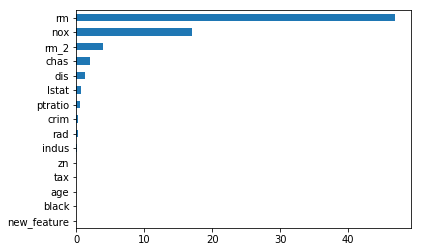

In [0]:
predictors = train_df.drop('medv', axis=1)
predictors['rm_2'] = predictors['rm'].map(lambda x: x ** 2)
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=40)
columns = predictors.columns
lr_3 = LinearRegression()
lr_3.fit(X_train, y_train)
print('Score: {}'.format(lr_3.score(X_test, y_test)))
print('MSE: {}'.format(mean_squared_error(y_test, lr_3.predict(X_test))))
coefficients = lr_3.coef_
print(coefficients)
feature_importance = pd.Series(coefficients, index=columns)
ordered_feature_importance = feature_importance.abs().sort_values()
ordered_feature_importance.plot.barh()
plt.show()

In [0]:
predictors = train_df[['nox', 'rm', 'chas', 'dis', 'ptratio', 'lstat', 'rad']]
predictors['rm_2'] = predictors['rm'].map(lambda x: x ** 2)
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=40)
columns = predictors.columns
lr_4 = LinearRegression()
lr_4.fit(X_train, y_train)
print('Score: {}'.format(lr_4.score(X_test, y_test)))
print('MSE: {}'.format(mean_squared_error(y_test, lr_4.predict(X_test))))

Score: 0.7128291443501316
MSE: 22.08650434835895


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
predictors = train_df[['nox', 'rm', 'chas', 'dis', 'ptratio', 'lstat', 'rad']]
steps = [
    ('scaler', MinMaxScaler()),
    ('poly', PolynomialFeatures(3)),
    ('model', LinearRegression())
]
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=40)
columns = predictors.columns
lr_5 = Pipeline(steps)
lr_5.fit(X_train, y_train)
print('Score: {}'.format(lr_5.score(X_test, y_test)))
print('MSE: {}'.format(mean_squared_error(y_test, lr_5.predict(X_test))))

Score: -0.028930654560475055
MSE: 79.13575117043798
